In [38]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.1 MB/s eta 0:00:00


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import category_encoders as ce

In [40]:
data_train = pd.read_csv('/content/drive/MyDrive/datasets/houseprice/train.csv')
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [41]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## PreProccessing

In [42]:
# Number of missing values ​​in each column
missing_data = data_train.isnull().sum().sort_values(ascending=False)

# Percentage of missing values ​​in each column
missing_percentage = (data_train.isnull().sum()/data_train.shape[0]).sort_values(ascending=False)

# Display columns that have missing data
missing_data  = pd.concat([missing_data, missing_percentage], axis=1, keys=['Missing Count', 'Percentage'])
missing_data.head(20)

,Missing Count,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


In [43]:
# Remove columns with more than 45% missing data
data_train = data_train.drop(columns=missing_data[missing_data['Percentage'] > 0.45].index)
data_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [44]:
# Replacing missing values column with mean or mod
data_train['LotFrontage'].fillna(data_train['LotFrontage'].mean(), inplace=True)

cols_replace_with_mode = missing_data[(missing_data['Percentage'] > 0) & (missing_data['Percentage'] < 0.1)].index.tolist()
for col in cols_replace_with_mode:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)

data_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [45]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [47]:
# Convert category values ​​to numeric codes

categorical_columns = data_train.select_dtypes(include=['object']).columns.tolist()

encoder = ce.TargetEncoder(cols=categorical_columns)

data_train = encoder.fit_transform(data_train, data_train['SalePrice'])
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,191004.994787,65.0,8450,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,2,2008,173401.836622,175202.219533,208500
1,2,20,191004.994787,80.0,9600,181130.538514,164754.818378,180183.746758,180950.95682,178122.652042,...,0,0,0,0,0,5,2007,173401.836622,175202.219533,181500
2,3,60,191004.994787,68.0,11250,181130.538514,206101.665289,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,9,2008,173401.836622,175202.219533,223500
3,4,70,191004.994787,60.0,9550,181130.538514,206101.665289,180183.746758,180950.95682,181623.425855,...,272,0,0,0,0,2,2006,173401.836622,146537.060693,140000
4,5,60,191004.994787,84.0,14260,181130.538514,206101.665289,180183.746758,180950.95682,178122.652042,...,0,0,0,0,0,12,2008,173401.836622,175202.219533,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,191004.994787,62.0,7917,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,8,2007,173401.836622,175202.219533,175000
1456,1457,20,191004.994787,85.0,13175,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,2,2010,173401.836622,175202.219533,210000
1457,1458,70,191004.994787,66.0,9042,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,2500,5,2010,173401.836622,175202.219533,266500
1458,1459,20,191004.994787,68.0,9717,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,112,0,0,0,0,4,2010,173401.836622,175202.219533,142125


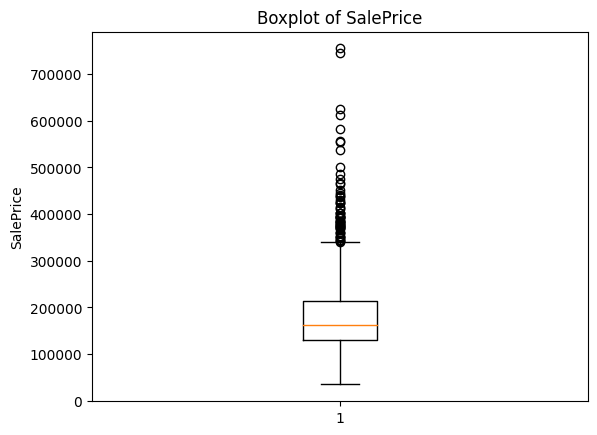

In [48]:
# Checking for outliers in the SalePrice column
plt.boxplot(data_train['SalePrice'])
plt.title('Boxplot of SalePrice')
plt.ylabel('SalePrice')
plt.show()

In [49]:
# Remove house priced over $500,000
data_train = data_train[data_train['SalePrice'] < 500000]
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,191004.994787,65.0,8450,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,2,2008,173401.836622,175202.219533,208500
1,2,20,191004.994787,80.0,9600,181130.538514,164754.818378,180183.746758,180950.95682,178122.652042,...,0,0,0,0,0,5,2007,173401.836622,175202.219533,181500
2,3,60,191004.994787,68.0,11250,181130.538514,206101.665289,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,9,2008,173401.836622,175202.219533,223500
3,4,70,191004.994787,60.0,9550,181130.538514,206101.665289,180183.746758,180950.95682,181623.425855,...,272,0,0,0,0,2,2006,173401.836622,146537.060693,140000
4,5,60,191004.994787,84.0,14260,181130.538514,206101.665289,180183.746758,180950.95682,178122.652042,...,0,0,0,0,0,12,2008,173401.836622,175202.219533,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,191004.994787,62.0,7917,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,8,2007,173401.836622,175202.219533,175000
1456,1457,20,191004.994787,85.0,13175,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,0,2,2010,173401.836622,175202.219533,210000
1457,1458,70,191004.994787,66.0,9042,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,0,0,0,0,2500,5,2010,173401.836622,175202.219533,266500
1458,1459,20,191004.994787,68.0,9717,181130.538514,164754.818378,180183.746758,180950.95682,176938.047529,...,112,0,0,0,0,4,2010,173401.836622,175202.219533,142125


# Train Model

In [50]:
X = data_train.drop(columns=['Id', 'SalePrice'])
y = data_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(266, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse')

In [54]:
# Define stop condition
early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e5, verbose=1, mode='min')

output = model.fit(X_train, y_train, epochs=5000, callbacks=[early_stopping])

Epoch 1/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 37294985216.0000
Epoch 2/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38417768448.0000
Epoch 3/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36814536704.0000
Epoch 4/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 33436964864.0000
Epoch 5/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26554814464.0000
Epoch 6/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14337775616.0000
Epoch 7/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7014914048.0000
Epoch 8/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5656602112.0000
Epoch 9/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4493993984.0000
Epoch 10/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4324849664.0000
Epoch 11/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3831556608.0000
Epoch 12/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3981618432.0000
Epoch 13/5000
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3491326464.0000
Ep

Loss: 6351358.5
RMSE: 2520.0


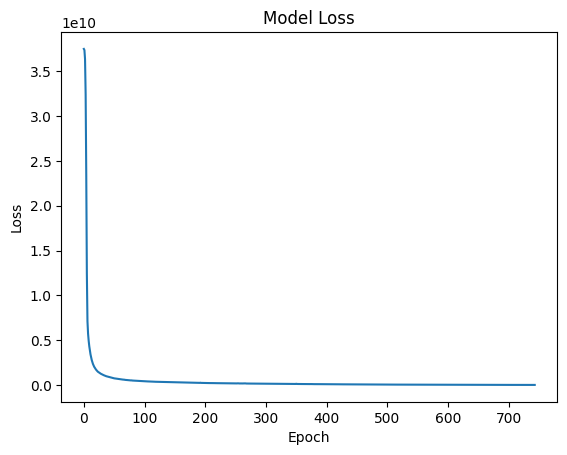

In [69]:
print('Loss:', output.history['loss'][-1])
print('RMSE:', round(np.sqrt(output.history['loss'][-1]), 0))
plt.plot(output.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [56]:
model.save('/content/drive/MyDrive/datasets/houseprice/modelHousePrices.h5')
model.save('/content/drive/MyDrive/datasets/houseprice/modelHousePrices.keras')

In [70]:
result = model.evaluate(X_test, y_test)
print(f'Loss: {result}')
print(f'RMSE: {round(np.sqrt(result), 0)}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 784209792.0000 
Loss: 869377408.0
RMSE: 29485.0


In [82]:
data_test = pd.read_csv('/content/drive/MyDrive/datasets/houseprice/test.csv')
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [83]:
data_target = pd.read_csv('/content/drive/MyDrive/datasets/houseprice/sample_submission.csv')
data_target.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


### Pre Proccessing (test data)

In [84]:
data_test['SalePrice'] = data_target['SalePrice']
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [85]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [86]:
# Number of missing values ​​in each column
missing_data = data_test.isnull().sum().sort_values(ascending=False)

# Percentage of missing values ​​in each column
missing_percentage = (data_test.isnull().sum()/data_test.shape[0]).sort_values(ascending=False)

# Display columns that have missing data
missing_data  = pd.concat([missing_data, missing_percentage], axis=1, keys=['Missing Count', 'Percentage'])

missing_data.head(20)

,Missing Count,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
MasVnrType,894,0.612748
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageFinish,78,0.053461
GarageQual,78,0.053461
GarageCond,78,0.053461


In [87]:
# Remove columns with more than 45% missing data
data_test = data_test.drop(columns=missing_data[missing_data['Percentage'] > 0.45].index)

data_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,150730.079977
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,177150.989247
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,500,3,2010,WD,Normal,172070.659229
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,175110.956520
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,162011.698832
9,1470,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,160726.247831


In [88]:
# Replacing missing values column with mean or mod
data_test['LotFrontage'].fillna(data_test['LotFrontage'].mean(), inplace=True)

cols_replace_with_mode = missing_data[(missing_data['Percentage'] > 0) & (missing_data['Percentage'] < 0.1)].index.tolist()
for col in cols_replace_with_mode:
    data_test[col].fillna(data_test[col].mode()[0], inplace=True)

data_test.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.000000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.000000,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.000000,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.000000,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.000000,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,150730.079977
5,1466,60,RL,75.000000,10000,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,177150.989247
6,1467,20,RL,68.580357,7980,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,500,3,2010,WD,Normal,172070.659229
7,1468,60,RL,63.000000,8402,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,175110.956520
8,1469,20,RL,85.000000,10176,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,162011.698832
9,1470,20,RL,70.000000,8400,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,160726.247831


In [89]:
# # کپی کردن سطر آخر
# last_row = data_test.iloc[-1].copy()

# # تبدیل سطر به DataFrame و اضافه کردن آن به انتهای دیتاست
# data_test = pd.concat([data_test, pd.DataFrame([last_row])], ignore_index=True)

# data_test.tail()

In [90]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [91]:
data_test = encoder.transform(data_test)


In [94]:
X_test = data_test.drop(columns=['Id', 'SalePrice'])
y_test = data_test['SalePrice']

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

In [96]:
model.predict(X_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 98300.445],
       [205688.62 ],
       [209903.95 ],
       ...,
       [209903.42 ],
       [116447.91 ],
       [228027.81 ]], dtype=float32)